# Titanic: Machine Learning from Disaster

###### May, 2020

##### features
Variable | Definition   | Key <br>
survival | Survival     | 0 = No, 1 = Yes <br>
pclass	 | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex      | Sex	
Age	     | Age in years	
sibsp    | # of siblings / spouses aboard the Titanic	
parch	 | # of parents / children aboard the Titanic	
ticket	 | Ticket number	
fare	 | Passenger fare	
cabin	 | Cabin number	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'D:\Projects and Pancakes\Titanic\train.csv')
train.shape

(891, 12)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv(r'D:\Projects and Pancakes\Titanic\test.csv')
test.shape

(418, 11)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### combine train and test for 
1. data exploration
2. data preprocessing
3. adding a feature

In [6]:
df = pd.concat([train, test], sort=False)
df.columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum(axis=0)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
combine = [train, test]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Slemen, Mr. Richard James",male,1601,B96 B98,S
freq,1,577,7,4,644


In [12]:
train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Exploration&Visualization before analysis

Text(33.0, 0.5, 'Row number')

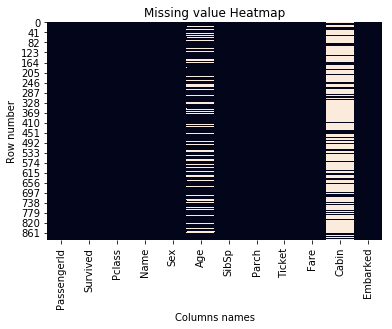

In [13]:
sns.heatmap(train.isnull(), cbar=False) #cbar set to false since it is binary 
plt.title('Missing value Heatmap')
plt.xlabel('Columns names')
plt.ylabel('Row number')

There are a lot of missing values in Age and Cabin columns

Text(0.5, 1.0, 'Correlation Plot Matrix')

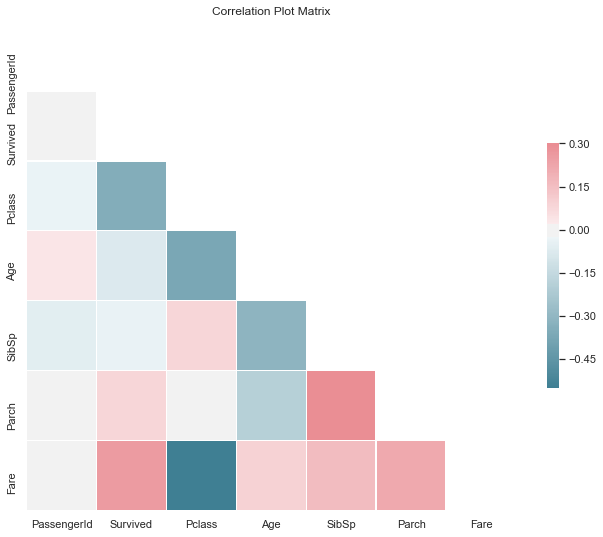

In [14]:
sns.set(style="white")
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Plot Matrix')

C:\Users\ytjya\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ytjya\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


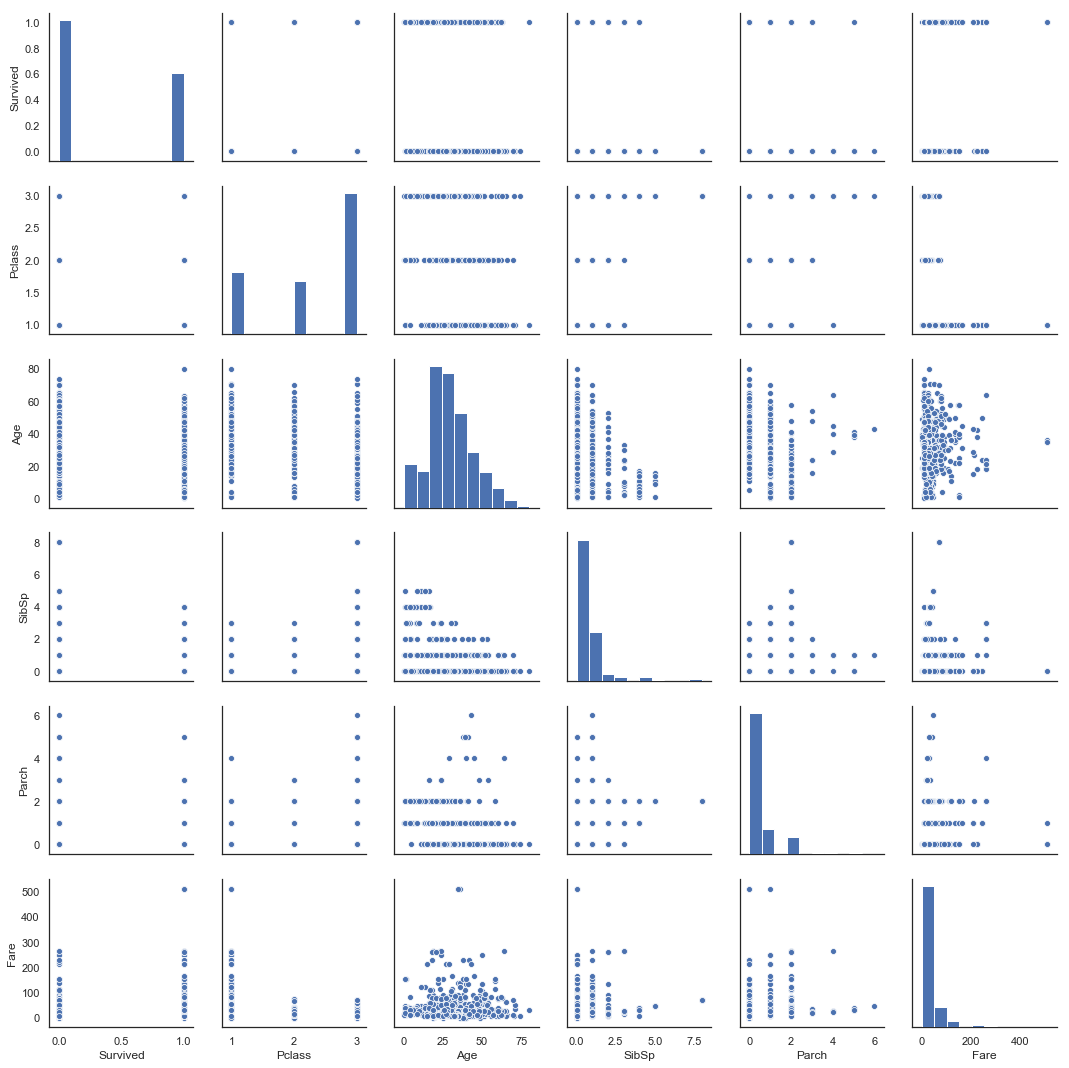

In [15]:
# pairplot of selected columns 
train.columns
sns.pairplot(train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']])

## PreProcessing and analyze data

#### examine pivoted tables

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### visualization

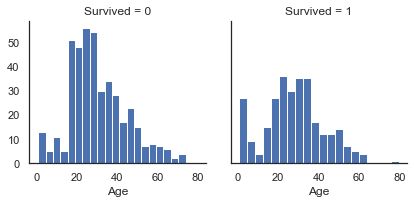

In [20]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

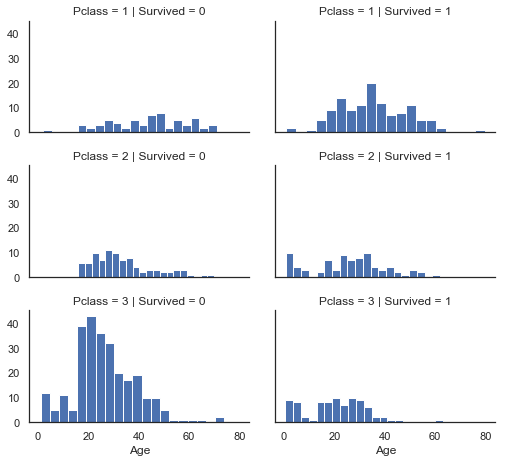

In [21]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6) # parameter size changed to height
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

In [22]:
np.min(train.Age), np.max(train.Age)

(0.42, 80.0)

Text(0, 0.5, 'Frequency')

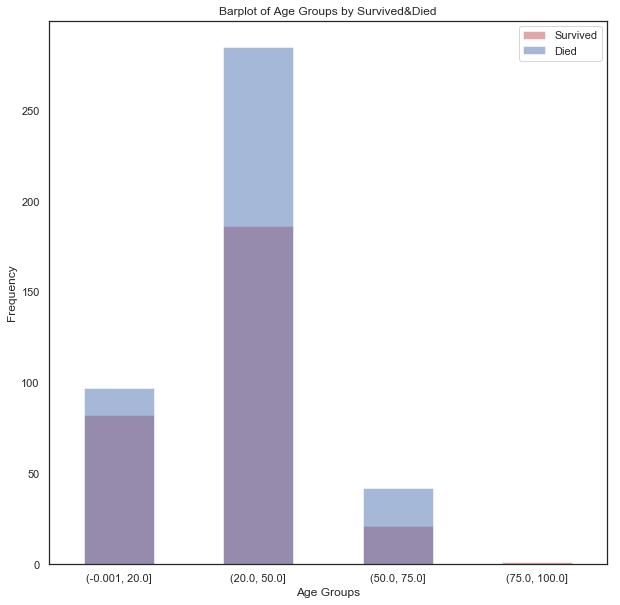

In [23]:
bins = [0, 20, 50, 75, 100]

out = pd.cut(train.Age[train.Survived == 1], bins = bins, include_lowest = True)
ax = out.value_counts(sort = False).plot.bar(rot = 0, color = 'r', figsize = (10,10), alpha = 0.5)
out = pd.cut(train.Age[train.Survived == 0], bins = bins, include_lowest = True)
ax = out.value_counts(sort = False).plot.bar(rot = 0, color = 'b', figsize = (10,10), alpha = 0.5)

plt.legend(['Survived', 'Died'])
plt.title('Barplot of Age Groups by Survived&Died')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')

#### Features/Variables

###### Age

In [24]:
# however, there are a lot of missing values on age
# treat missing values on age column
"""from sklearn.impute import SimpleImputer
NaN = np.nan
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
age = imp.fit_transform(np.array(train.Age).reshape(1,-1))
print(age)
age.shape"""

"from sklearn.impute import SimpleImputer\nNaN = np.nan\nimp = SimpleImputer(missing_values=np.nan, strategy='mean')\nage = imp.fit_transform(np.array(train.Age).reshape(1,-1))\nprint(age)\nage.shape"

In [25]:
train.Age.mean()

29.69911764705882

In [26]:
# replace NaN by the mean of the column
train = train.fillna(train.mean())
test.Age = test.Age.fillna(test.Age.mean())
# train.Age = train.Age.fillna(train.Age.mean())

In [27]:
# missing values in Age column is replaced by the mean of Age
# the rest of the columns are object type and therefore not replaced
train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
test.Age.isnull().sum(0)

0

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train.Age = train.Age.astype(int)
test.Age = test.Age.astype(int)

In [31]:
# evenly divide age into 5 groups based on min and max ages
train['AgeGroup'] = pd.cut(train.Age, 5)
train[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

,AgeGroup,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Text(0, 0.5, 'Frequency')

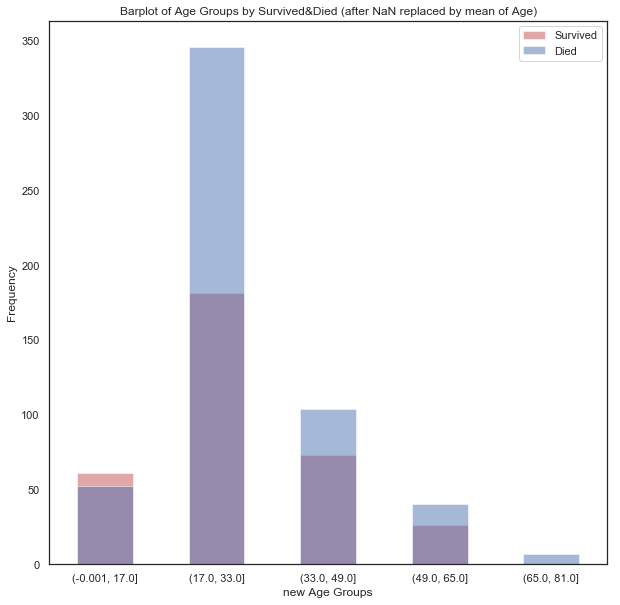

In [32]:
bins = [0, 17, 33, 49, 65, 81]  

out = pd.cut(train.Age[train.Survived == 1], bins = bins, include_lowest = True)
ax = out.value_counts(sort = False).plot.bar(rot = 0, color = 'r', figsize = (10,10), alpha = 0.5)
out = pd.cut(train.Age[train.Survived == 0], bins = bins, include_lowest = True)
ax = out.value_counts(sort = False).plot.bar(rot = 0, color = 'b', figsize = (10,10), alpha = 0.5)

plt.legend(['Survived', 'Died'])
plt.title('Barplot of Age Groups by Survived&Died (after NaN replaced by mean of Age)')
plt.xlabel('new Age Groups')
plt.ylabel('Frequency')

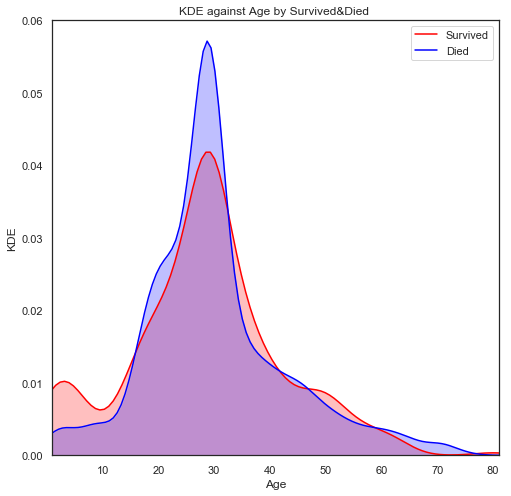

In [33]:
plt.figure(figsize=(8,8))
sns.kdeplot(
        train.Age[train.Survived == 1],
        color = 'red',
        shade = True
        )

sns.kdeplot(
        train.Age[train.Survived == 0],
        color = 'blue',
        shade = True
        )

plt.legend(['Survived', 'Died'])
plt.title('KDE against Age by Survived&Died ')
plt.xlabel('Age')
plt.ylabel('KDE')
plt.xlim(np.min(train.Age) + 1, np.max(train.Age) + 1)
plt.show()

#### converting variable values

AgeGroup, Name, Sex, Ticket, need to be converted into integral values according to their categories

###### AgeGroup
Children and Elderly had priority to board on rescue boats

In [34]:
combine = [train, test]
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


In [35]:
train.Age.unique(), test.Age.unique()

(array([1, 2, 3, 0, 4], dtype=int64), array([2, 3, 1, 0, 4], dtype=int64))

In [36]:
# Age is converted to categorical variable and AgeGroup is no longer needed
train = train.drop(['AgeGroup'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S


###### Name
Name consists of titles and there is a suspicion that titles have an impact on surival rate

In [37]:
train['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,0,1
Dr,1,0
Master,6,15
Miss,26,52
Mr,95,145
Mrs,31,41
Ms,1,0
Rev,0,2


In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,Mr
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,Mrs


In [39]:
train.Title.unique(), test.Title.unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona',
        nan], dtype=object),
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
       dtype=object))

In [40]:
# common titles: 'Mr', 'Mrs', 'Miss'
# ship/military personnel titles: 'Major', 'Col', 'Capt'
# other: 'Master', 'Don', 'Rev', 'Dr', 'Countess'
combine = [train, test]
for dataset in combine:
    dataset.Title = dataset.Title.replace(['Don', 'Rev', 'Dr', 'Jonkheer', 'Dona', \
                                                 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess'], 'Other')
    dataset.Title  = dataset.Title.replace('Mlle', 'Miss')
    dataset.Title  = dataset.Title.replace('Ms', 'Miss')
    dataset.Title  = dataset.Title.replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.380952
1,Miss,0.354430
2,Mr,0.420833
3,Mrs,0.347222
4,Other,0.166667


In [41]:
# convert to numerical values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,3.0


In [42]:
train.Title = train.Title.astype(int)
test.Title = test.Title.astype(int)

In [43]:
# titles are extracted from names and names do not have impact. Therefore, Name column is dropped
train = train.drop(['Name', 'PassengerId'], axis=1)
# passengerID is kept for test set for submission purpose
test = test.drop(['Name'], axis=1)

In [44]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,1,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,female,2,1,0,PC 17599,71.2833,C85,C,3
2,1,3,female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,female,2,1,0,113803,53.1000,C123,S,1
4,0,3,male,2,0,0,373450,8.0500,NaN,S,3


In [45]:
train.Title.unique(), test.Title.unique(), 

(array([1, 3, 2, 4, 0], dtype=int64), array([1, 3, 2, 4, 0], dtype=int64))

###### Sex
Sex has an impact on surival rate since females had priority to board on rescue boats

In [46]:
combine = [train, test]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,1,2,1,0,113803,53.1000,C123,S,1
4,0,3,0,2,0,0,373450,8.0500,NaN,S,3


###### Fare, Ticket
Ticket is related to fare, class, etc. There is a suspicion that the most expensive ticket holders had higher surival rates as they had priority to board rescue boats.

In [47]:
train.Fare.isnull().sum(0), test.Fare.isnull().sum(0)

(0, 1)

In [48]:
# there is only one missing value in Fare column
test.Fare.fillna(test.Fare.dropna().median(), inplace=True)

In [49]:
train['FareGroup'] = pd.qcut(train['Fare'], 4)
train[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [50]:
# convert Fare to categorical variables from 0 to 3
combine = [train, test]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [51]:
train= train.drop(['FareGroup', 'Ticket'], axis=1)
test= test.drop(['Ticket'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,0,NaN,S,1
1,1,1,1,2,1,0,3,C85,C,3
2,1,3,1,1,0,0,1,NaN,S,1
3,1,1,1,2,1,0,3,C123,S,1
4,0,3,0,2,0,0,1,NaN,S,3


###### SibSp, Parch

In [52]:
train.SibSp.unique(), test.SibSp.unique()

(array([1, 0, 3, 4, 2, 5, 8], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 8], dtype=int64))

In [53]:
train.Parch.unique(), test.Parch.unique()

(array([0, 1, 2, 5, 3, 4, 6], dtype=int64),
 array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64))

In [54]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [55]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [56]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

###### Embarked

In [57]:
train.Embarked.isnull().sum(0)

2

In [58]:
mode = train.Embarked.dropna().mode()[0]

In [59]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(mode)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [60]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,0,NaN,0,1,0
1,1,1,1,2,3,C85,1,3,0
2,1,3,1,1,1,NaN,0,1,1
3,1,1,1,2,3,C123,0,1,0
4,0,3,0,2,1,NaN,0,3,1


###### Cabin

In [61]:
# There are too many missing values in the Cabin column and they are names. Therefore, Cabin is dropped
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

###### New Feature (interative)

In [62]:
combine = [train, test]
for dataset in combine:
    dataset['AgeClass'] = 0
    dataset['AgeClass'] = dataset.Age * dataset.Pclass

In [63]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeClass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,1,1,3
3,1,1,1,2,3,0,1,0,2
4,0,3,0,2,1,0,3,1,6


## Model Building, Evalutation

In [64]:
X_train = train.drop('Survived', axis=1)
y_train = train.Survived
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [65]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [66]:
# logistic regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
acc_log = round(log.score(X_train, y_train) * 100, 2)
str(acc_log)+'%'

C:\Users\ytjya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'79.24%'

0.792368125701459

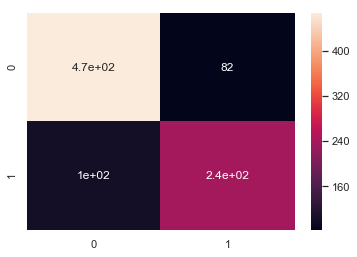

In [67]:
# heatmap of confusion matrix  
y_pred = log.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, cbar=True, annot=True) #cbar set to false since it is binary
(cm[0,0]+cm[1,1])/np.sum(cm)

In [68]:
# SVM
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
str(acc_svc)+'%'

C:\Users\ytjya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'82.38%'

0.8237934904601572

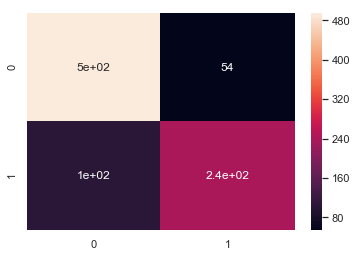

In [69]:
# heatmap of confusion matrix SVC
y_pred = svc.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, cbar=True, annot=True)
(cm[0,0]+cm[1,1])/np.sum(cm)

In [70]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
str(acc_knn)+'%'

'83.16%'

0.8316498316498316

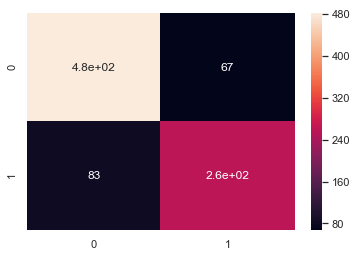

In [71]:
# heatmap of confusion matrix
y_pred = knn.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, cbar=True, annot=True)
(cm[0,0]+cm[1,1])/np.sum(cm)

In [72]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_linear_svc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
str(acc_linear_svc)+'%'

C:\Users\ytjya\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'79.69%'

0.7968574635241302

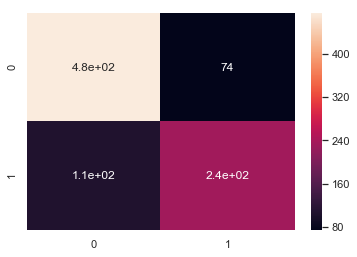

In [73]:
# heatmap of confusion matrix
y_pred = linear_svc.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, cbar=True, annot=True)
(cm[0,0]+cm[1,1])/np.sum(cm)

In [74]:
# Stochastic Gradient Descend
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
str(acc_sgd)+'%'

C:\Users\ytjya\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


'63.08%'

0.6307519640852974

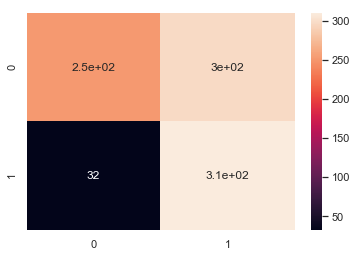

In [75]:
# heatmap of confusion matrix SVC
y_pred = sgd.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, cbar=True, annot=True)
(cm[0,0]+cm[1,1])/np.sum(cm)

In [76]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
str(acc_decision_tree)+'%'

'88.44%'

0.8843995510662177

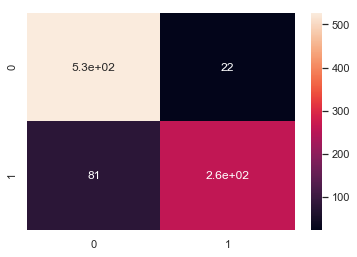

In [77]:
# heatmap of confusion matrix SVC
y_pred = decision_tree.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, cbar=True, annot=True)
(cm[0,0]+cm[1,1])/np.sum(cm)

In [78]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
str(acc_random_forest)+'%'

'88.44%'

0.8843995510662177

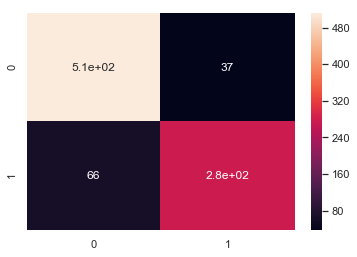

In [79]:
# heatmap of confusion matrix SVC
y_pred = random_forest.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, cbar=True, annot=True)
(cm[0,0]+cm[1,1])/np.sum(cm)

In [80]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Stochastic Gradient Descend', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_sgd,
              acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.44
6,Decision Tree,88.44
1,KNN,83.16
0,Support Vector Machines,82.38
5,Linear SVC,79.69
2,Logistic Regression,79.24
4,Stochastic Gradient Descend,63.08


In [84]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })
submission.to_csv(r'D:\Projects and Pancakes\Titanic\submissionRF.csv', index=False)

###### End of project